# Convolution

We will look at:
* numpy
* matplotlib use 
* profiling built-in vs hand-coded
* 1D and 2D convolutions

### Numpy - numerical python
Provides multidimensional arrays and lots of functions on it
http://docs.scipy.org/doc/numpy-1.10.0/reference/

In [50]:
import numpy as np

In [52]:
a = np.array([1,2,3])
b = np.array([3,2,1])

In [54]:
a * 3

array([3, 6, 9])

In [55]:
b - 5

array([-2, -3, -4])

In [56]:
a - b

array([-2,  0,  2])

In [57]:
a * b

array([3, 4, 3])

In [60]:
np.dot(a, b)

10

In [119]:
a[0] * b[0] + a[1] * b[1] + a[2] * b[2]

10

In [62]:
np.linalg.norm(a) # gets L2 norm = length of vector = sqrt(a[0]**2 + a[1]**2 + a[2]**2)

3.7416573867739413

In [64]:
np.sqrt(a[0]**2 + a[1]**2 + a[2]**2)

3.7416573867739413

### Matplotlib - simple plotting (close to MATLAB compatibility)

In [81]:
import matplotlib.pyplot as plt # plotting functions from this module (need to be prefixed with "plt." )

In [80]:
# ignore the following, just needed for this interactive demo
import matplotlib
%matplotlib inline 
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

In [118]:
np.arange(5) # same as range, but returns a numpy array

array([0, 1, 2, 3, 4])

In [135]:
x = np.arange(2*np.pi, step=0.5)
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ])

In [136]:
x.shape

(13,)

In [137]:
y = np.sin(x) # evaluate sinus for each point in x
y.shape

(13,)

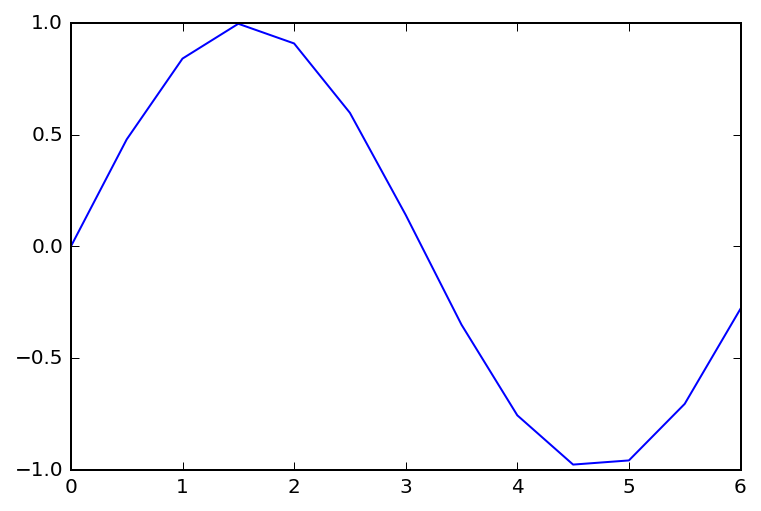

In [138]:
plt.plot(x, y) # plot a line (linear between given points)

In [158]:
# compute again, with higher detail!
x = np.arange(2*np.pi, step=0.1)
y = np.sin(x)

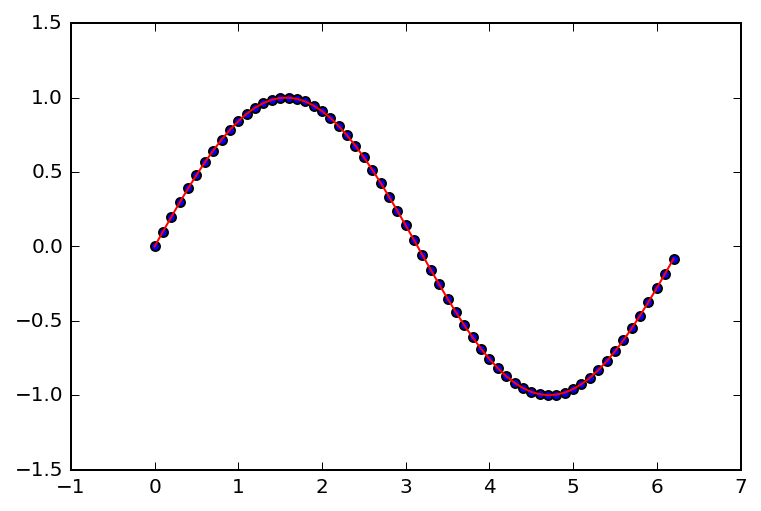

In [160]:
plt.hold(True) # lets you overlay several lines in one figure
plt.plot(x, y, 'r') # 'r' is for the red line color
plt.scatter(x,y) # scatter plot = points only
plt.savefig('/Users/chaubold/Desktop/test.png') # save figure to disk

### 1D Convolution

$ f * g (t) = \int_{-\infty}^{\infty} f(\tau) g(t - \tau) d\tau $

See [wikipedia](https://en.wikipedia.org/wiki/Convolution) if you need an explanation.


In [140]:
import scipy.ndimage
kernel = np.zeros(51)
kernel[25] = 1
kernel = scipy.ndimage.filters.gaussian_filter1d(kernel, sigma=4.0)

In [141]:
kernel

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         3.34587404e-05,   8.81520400e-05,   2.18178394e-04,
         5.07279965e-04,   1.10800131e-03,   2.27347108e-03,
         4.38223020e-03,   7.93519376e-03,   1.34982193e-02,
         2.15700930e-02,   3.23805448e-02,   4.56638872e-02,
         6.04948218e-02,   7.52870222e-02,   8.80194464e-02,
         9.66704500e-02,   9.97390995e-02,   9.66704500e-02,
         8.80194464e-02,   7.52870222e-02,   6.04948218e-02,
         4.56638872e-02,   3.23805448e-02,   2.15700930e-02,
         1.34982193e-02,   7.93519376e-03,   4.38223020e-03,
         2.27347108e-03,   1.10800131e-03,   5.07279965e-04,
         2.18178394e-04,   8.81520400e-05,   3.34587404e-05,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

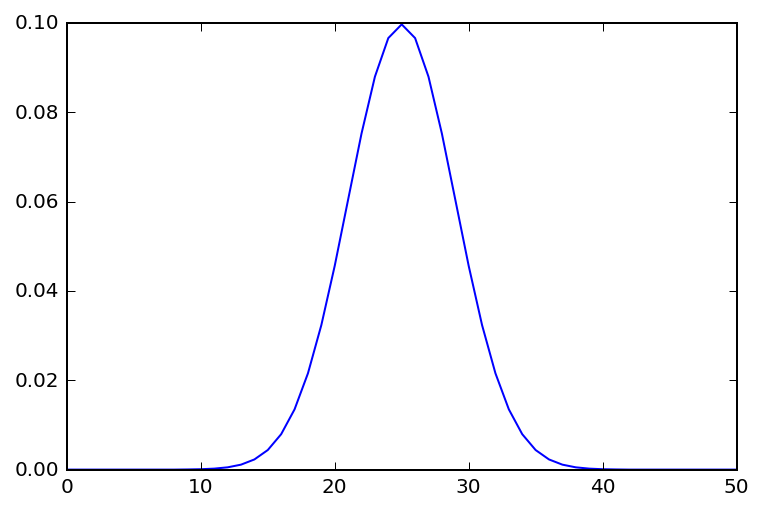

In [142]:
plt.plot(kernel)

In [143]:
signal = np.random.rand(300) # random signal

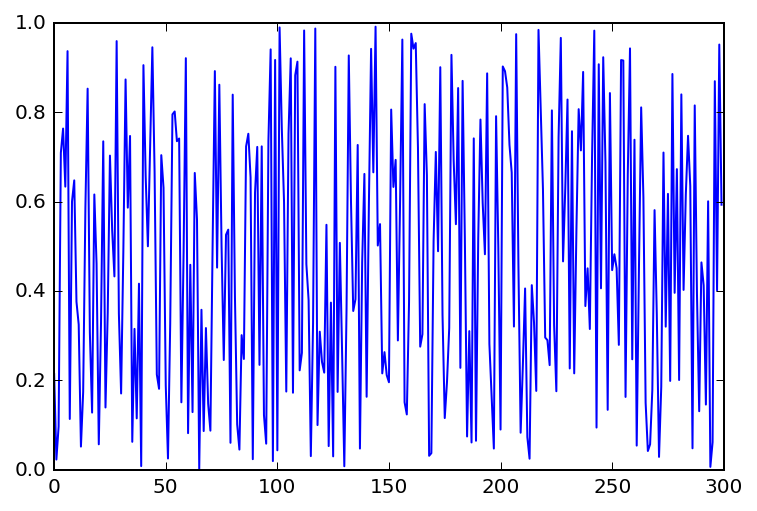

In [144]:
plt.plot(signal)

In [145]:
%timeit scipy.ndimage.convolve1d(signal, kernel)

The slowest run took 8.83 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 17.4 µs per loop


In [146]:
convSignal = scipy.ndimage.convolve1d(signal, kernel)

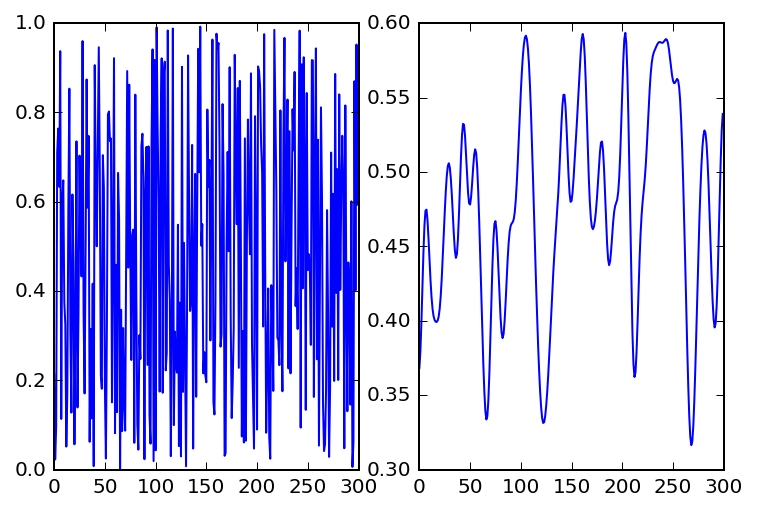

In [153]:
plt.subplot(121)
plt.plot(signal)
plt.subplot(122)
plt.plot(convSignal)

## let us perform the convolution on our own:
'%%timeit' below only works in the interactive console, not when running a file. In spyder, select the lines you want to run (with %%timeit as first line) and then click Run->Selected Lines

In [48]:
%%timeit
ownConvolution = np.zeros(300)
for i in range(25,275):
    ownConvolution[i] = np.dot(signal[i-25:i+26], kernel)

1000 loops, best of 3: 311 µs per loop


In [46]:
ownConvolution.shape

(300,)

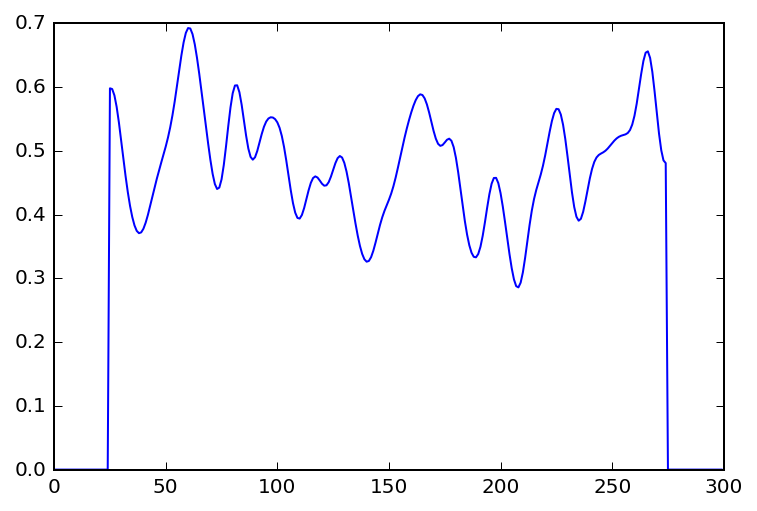

In [47]:
plt.plot(ownConvolution)

The borders are cut off because our for loop only went from 25 to 275! At the boundaries, the kernel would extend over the signal, then we need to perform some boundary handling.
The builting convolve1d has several modes to handle the border, see http://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.ndimage.filters.convolve1d.html

## 2D Convolution
Input Signal is an image! Load it as follows:

In [85]:
image = plt.imread('lena.png')

In [87]:
image.shape # has 3 color channels!

(512, 512, 3)

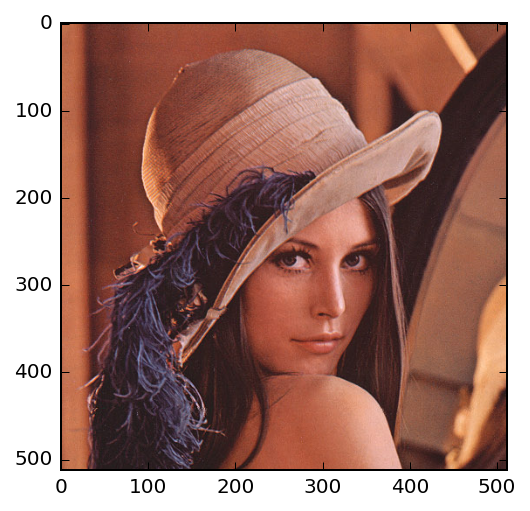

In [88]:
plt.imshow(image)

In [92]:
import skimage.color
imageGray = skimage.color.rgb2gray(image)

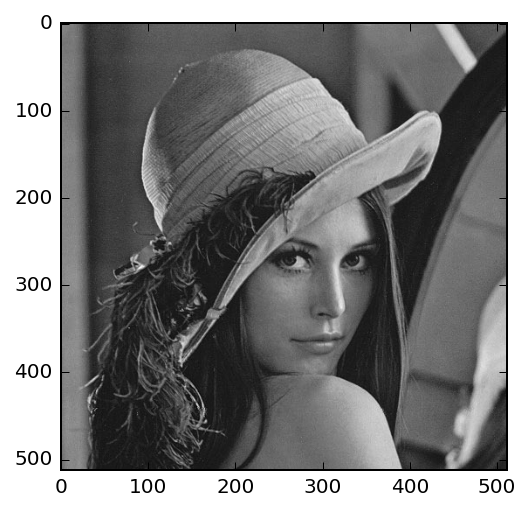

In [157]:
plt.imshow(imageGray, cmap='gray')

In [149]:
a = np.zeros((400, 400))

In [150]:
a.shape

(400, 400)